In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
y_train.shape

(60000,)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
len(x_train)

60000

In [8]:
x_train_flatter=x_train.reshape(len(x_train),28*28)

In [9]:
x_test_flatter=x_test.reshape(len(x_test),28*28)

In [10]:
x_train_flatter[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [11]:
x_train_flatter.shape

(60000, 784)

In [12]:
y_train.shape

(60000,)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_train=y_train.reshape(len(y_train),1)

In [42]:
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [27]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [28]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
y_train_categorical.shape

(60000, 10)

In [23]:
scaler_x=MinMaxScaler()

In [24]:
scaled_train_x=scaler_x.fit_transform(x_train_flatter)
scaled_test_x=scaler_x.transform(x_test_flatter)

In [38]:
scaled_train_x.shape

(60000, 784)

In [46]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
#     loss='sparse_categorical_crossentropy',
     loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(scaled_train_x,y_train_categorical ,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4683 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2726 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2660 - accuracy: 0.9257


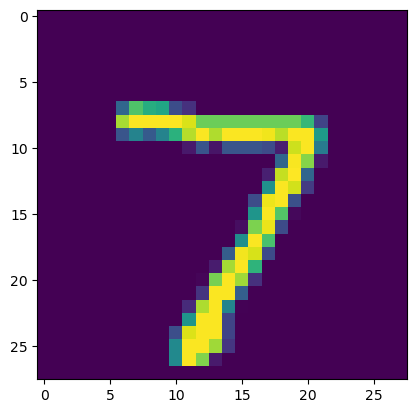

In [48]:
plt.imshow(x_test[0])

In [51]:
scaled_test_x.shape

(10000, 784)

In [54]:
model.predict(scaled_test_x)

313/313 [==============================] - 1s 4ms/step


array([[2.6382886e-02, 3.4230621e-07, 5.0460752e-02, ..., 9.9977988e-01,
        1.0295710e-01, 6.7601508e-01],
       [4.5282072e-01, 1.0614822e-02, 9.9907386e-01, ..., 6.1565548e-13,
        8.1782058e-02, 2.5031652e-09],
       [5.4036919e-04, 9.9476546e-01, 5.7593590e-01, ..., 1.3724776e-01,
        2.8216311e-01, 4.2810772e-02],
       ...,
       [6.3417988e-06, 6.5591389e-06, 9.1453432e-04, ..., 2.2688529e-01,
        4.7593406e-01, 7.6957506e-01],
       [2.3996059e-04, 2.2384665e-04, 1.4054042e-04, ..., 2.9855171e-05,
        6.7037654e-01, 1.1653522e-04],
       [1.9598069e-02, 5.5027743e-10, 1.6804625e-01, ..., 9.9333306e-09,
        2.2737047e-04, 9.0942626e-07]], dtype=float32)

In [41]:
model.evaluate(scaled_test_x,y_test_categorical)

313/313 [==============================] - 2s 4ms/step - loss: 0.2663 - accuracy: 0.9272


[0.26629573106765747, 0.9272000193595886]

In [36]:
23*23

529

In [19]:
# here i am getting low accuracy because i am using the minmaxscalling method 
# instide of it use the x_train=x_train/256
# this will be the best method

In [20]:
#  then i can add one hidden layer in it also

In [ ]:
# listen carefully here there are 3 ways

# 1. norwal way in which y_train=array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)
# and loss= loss='sparse_categorical_crossentropy',



# 2. change the dimension of y_train=y_train.reshape(len(y_train),1)
# array([[5],
#        [0],
#        [4],
#        ...,
#        [5],
#        [6],
#        [8]], dtype=uint8)
# and loss= loss='sparse_categorical_crossentropy',



# 3. adding ones where that comes and making the class where 1 comes
# and here the loss function will be     loss='categorical_crossentropy',
# y_train_categorical = keras.utils.to_categorical(
#     y_train, num_classes=10, dtype='float32'
# )
# y_test_categorical = keras.utils.to_categorical(
#     y_test, num_classes=10, dtype='float32'
# )
# array([[0., 0., 0., ..., 0., 0., 0.],
#        [1., 0., 0., ..., 0., 0., 0.],
#        [0., 0., 0., ..., 0., 0., 0.],
#        ...,
#        [0., 0., 0., ..., 0., 0., 0.],
#        [0., 0., 0., ..., 0., 0., 0.],
#        [0., 0., 0., ..., 0., 1., 0.]],

In [45]:
# in loss='categorical_crossentropy' you have you one hot encode the layers